In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from datetime import timedelta
from time import time
%matplotlib inline

In [10]:
z = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\urban-population-share-2050.csv",  parse_dates = True )
f = pd.read_csv(r"C:\Users\ixf9o\Desktop\climate_change_project\share-of-land-area-used-for-agriculture.csv", parse_dates = True)

In [11]:
 z =z.loc[z['Code'] == 'SAU']

In [12]:
z = z[['Year' ,"Urban population (%) long-run with 2050 projections (OWID)"]]

In [13]:
z.head()

,Year,Urban population (%) long-run with 2050 projections (OWID)
21412,1950,21.300
21413,1951,22.182
21414,1952,23.091
21415,1953,24.023
21416,1954,24.982


In [14]:
x = z.loc[:,['Year']]

In [15]:
y = z.loc[:,["Urban population (%) long-run with 2050 projections (OWID)"]]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [17]:
regr = LinearRegression()

regr.fit(x_train, y_train)

pred = regr.predict(x_test)

print('Coff:', regr.coef_)
print('Intercept:', regr.intercept_)

print('MSE:', mean_squared_error(y_test, pred))
print('r2_score:', r2_score(y_test, pred))
print('r2_score:', regr.score(x_test, y_test ))
#regr.predict([[2023]])

Coff: [[0.63269873]]
Intercept: [-1195.67303148]
MSE: 84.93704466434754
r2_score: 0.8329706404478452
r2_score: 0.8329706404478452


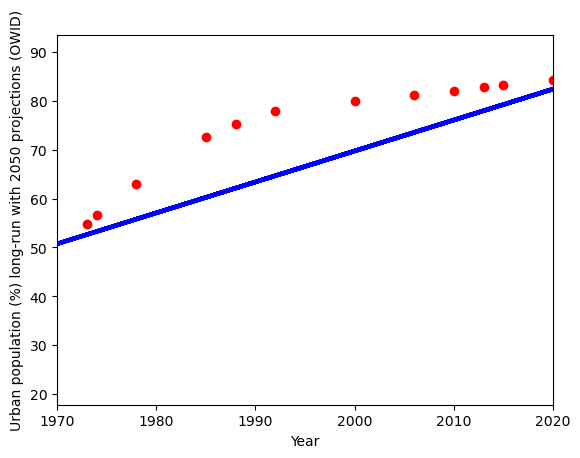

In [25]:
plt.xlabel('Year')
plt.ylabel('Urban population (%) long-run with 2050 projections (OWID)')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, pred, color = 'blue', linewidth=3)
ax = plt.gca()
ax.set_xlim([1970 ,2020])
#ax.set_ylim([20,70 ])

plt.show()